## Project description
recommendation system based on Amazon dataset.

Context:
Online e-commerce sites like Amazon, Flipkart use different recommendation models to provide different suggestions to different users.

Amazon currently uses item-to-item collaborative filtering, which spans big data sets and produces high-quality recommendations in real time.

## Attribute information:
● userId: Each user identified by a unique identifier

● productId: Each product identified by a unique identifier

● Rating: evaluation of the corresponding product by the corresponding user

● timestamp: time of the evaluation

## Goal :
● Creating a recommendation system to recommend products to users based on their past ratings for other products.




In [ ]:
# 1) Import the libraries that we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key savefig.frameon in file /Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to g

In [ ]:
df = pd.read_csv ('ratings_Electronics.csv',names=['userId', 'productId','Rating','timestamp'])

In [ ]:
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'Rating', 'timestamp'], dtype='object')

### Description des données

In [ ]:
df.dtypes


userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [ ]:
#'userId':discrete 
#'productId':discrete 
#'Rating':categorical
#'timestamp':discrete numeric 

In [ ]:
df.isna().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

### visualization of categorical variables



In [ ]:
categorical_variables=df[['Rating']]

In [ ]:
for c in categorical_variables.columns:
    print(c)
    print (categorical_variables[c].unique())


Rating
[5. 1. 3. 2. 4.]


In [ ]:
categorical_variables.describe()


,Rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


<AxesSubplot:>

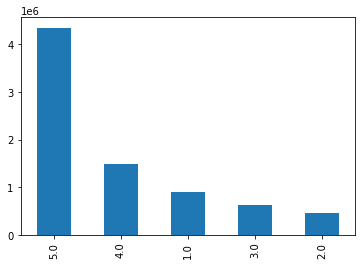

In [ ]:
categorical_variables['Rating'].value_counts().plot.bar()


In [ ]:
categorical_variables['Rating'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64

<AxesSubplot:>

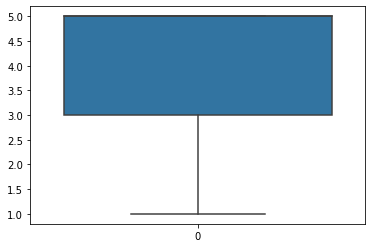

In [ ]:
sns.boxplot(data=df['Rating'])

In [1]:
## ## absence of outliers

### ### visualization of discrete variables


In [ ]:
discrete_variables=df[['timestamp']]
for c in discrete_variables.columns:
    print(c)
    print (discrete_variables[c].value_counts())


timestamp
1389052800    18276
1388707200    17698
1380672000    17649
1356652800    16108
1388448000    14377
              ...  
938736000         1
931305600         1
933897600         1
930009600         1
912988800         1
Name: timestamp, Length: 5489, dtype: int64


<AxesSubplot:>

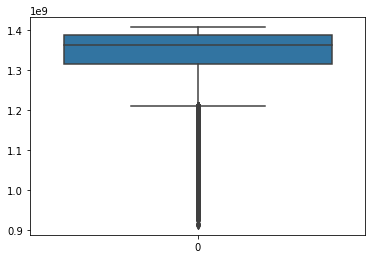

In [ ]:
sns.boxplot(data=df['timestamp'])

### Other visualization


In [ ]:

print("Unique UserID count: %s" % str(df['userId'].nunique()))
print("Unique ProductID count: %s" % str(df['productId'].nunique()))

Unique UserID count: 4201696
Unique ProductID count: 476002


In [2]:
#the number of userId is greater than the ProductID.



In [ ]:
df.corr()

,Rating,timestamp
Rating,1.000000,0.041648
timestamp,0.041648,1.000000


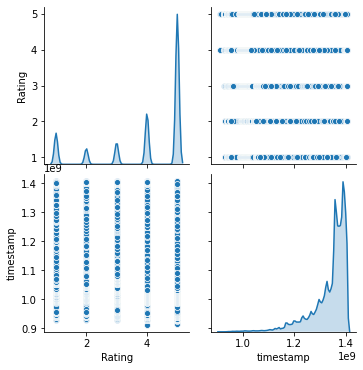

In [ ]:
sns.pairplot(df, diag_kind= 'kde')

As stated earlier, most clients gave 5. Very fewer clients gave 2.

So, we can infer one important thing that most of the electronic products are loved by customers.

Since we don't have many attributes and if we see the correlation between Rating and timestamp, we did not find any high correlation between them.


In [ ]:
df = df.drop(['timestamp'], axis=1)

In [ ]:
df.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [ ]:
for i in df:
    print(i,': ',df[i].isnull().sum())

userId :  0
productId :  0
Rating :  0


In [ ]:
df.isna().any()


userId       False
productId    False
Rating       False
dtype: bool

we can see that there are no missing values ​​which we also checked using the 2 functions isnull () and isna ().

In [ ]:
df1 = df.copy()


In [ ]:
df1

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [ ]:
users_counts = df['userId'].value_counts().rename('users_counts')
users_data   = df.merge(users_counts.to_frame(),left_on='userId',  right_index=True)


In [ ]:
users_data.head()

,userId,productId,Rating,users_counts
0,AKM1MP6P0OYPR,0132793040,5.0,2
5200191,AKM1MP6P0OYPR,B005UEB5TQ,5.0,2
1,A2CX7LUOHB2NDG,0321732944,5.0,4
1469593,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4
1980867,A2CX7LUOHB2NDG,B001EYU79A,5.0,4


In [ ]:
subset_df =users_data[users_data.users_counts >= 50]
subset_df.head()

,userId,productId,Rating,users_counts
94,A3BY5KCNQZXV5U,0594451647,5.0,50
14863,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
134213,A3BY5KCNQZXV5U,B000063574,5.0,50
338368,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


Above, we can only keep those users who have given 50 or more number of ratings.

In [ ]:
product_rating_counts = subset_df['productId'].value_counts().rename('product_rating_counts')
product_rating_data   = subset_df.merge(product_rating_counts.to_frame(),
                                left_on='productId',
                                right_index=True)

In [ ]:
product_rating_data = product_rating_data[product_rating_data.product_rating_counts >= 10]
product_rating=product_rating_data.sort_values('product_rating_counts', ascending=False)

<AxesSubplot:>

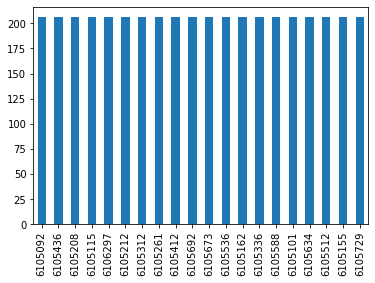

In [ ]:
product_rating['product_rating_counts'].head(20).plot(kind = "bar")

Here we only consider products that have received at least 10 reviews. Because there may be cases where the review count is 1 or 2 but the values ​​are 5, in this case these kinds of products will appear at the top for the recommendation which would not be a good recommendation technique.


In [ ]:
amazon_df = product_rating_data.copy()
amazon_df = amazon_df.drop(['users_counts'], axis=1)
amazon_df = amazon_df.drop(['product_rating_counts'], axis=1)

amazon_df.head()

,userId,productId,Rating
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0
633970,AKT8TGIT6VVZ5,B0007Y794O,5.0
633944,A1ILWPH1GHUXE2,B0007Y794O,4.0
634073,A1ZM846Y7AUYD,B0007Y794O,4.0
633998,A2ED50E3KWKUKW,B0007Y794O,5.0


In [ ]:
### Grouping sparce categories

In [ ]:
amazon_df['Rating'].value_counts(ascending=True)

1.0     1109
2.0     1612
3.0     4300
4.0    12044
5.0    23876
Name: Rating, dtype: int64

<AxesSubplot:>

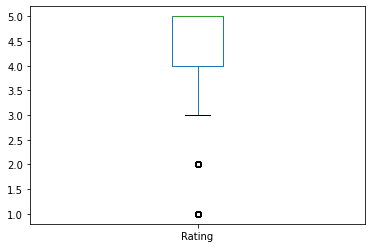

In [ ]:
amazon_df['Rating'].plot.box()

In [ ]:
for index in amazon_df.index:
    if amazon_df.loc[index,'Rating']== 1:
        amazon_df.loc[index,'Rating'] = 2


In [ ]:
amazon_df['Rating'].value_counts(ascending=True)

2.0     2721
3.0     4300
4.0    12044
5.0    23876
Name: Rating, dtype: int64

<AxesSubplot:>

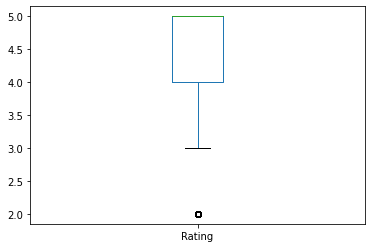

In [ ]:
amazon_df['Rating'].plot.box()

<AxesSubplot:>

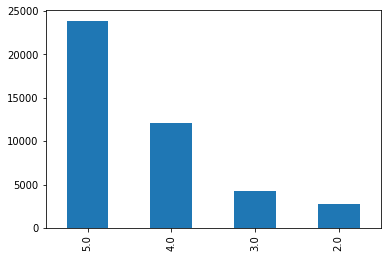

In [ ]:
amazon_df['Rating'].value_counts().plot.bar()


Rating: ordered categorical
So we can transform it into numeric attributes using Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
labelencoder = LabelEncoder()

amazon_df['Rating'] = labelencoder.fit_transform(amazon_df['Rating'])

In [ ]:
amazon_df.head()

,userId,productId,Rating
634048,A3BY5KCNQZXV5U,B0007Y794O,3
633970,AKT8TGIT6VVZ5,B0007Y794O,3
633944,A1ILWPH1GHUXE2,B0007Y794O,2
634073,A1ZM846Y7AUYD,B0007Y794O,2
633998,A2ED50E3KWKUKW,B0007Y794O,3


In [ ]:
amazon_df.shape

(42941, 3)

There are two main recommendation routes: 1-Content-based filtering models are based on item description and user history preference, and we don't need other users' feedback to make recommendations. Example: User likes three products designed by a certain company, so we recommend a fourth product designed by that company.

2-Collaborative filtering (CF) is a popular recommendation algorithm that bases its predictions and recommendations on the rating or behavior of other users of the system. We will use the collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people with similar interests. In other words, it uses the ratings of historical items from people with similar ratings to predict how someone would rate an item.

we are going to use collaborative filtering (CF) because our dataset only contains the evaluation of the product and it does not include product characteristics (price, weight, size, color, ...).

In the group of collaborative filtering, the two most well-known distinct approaches are 1- Memory-based models calculate similarities between users / items based on pairs of scores assigned by the user.

2-The models based on models (Model-based models) use a kind of automatic learning algorithm to estimate the evaluations. A typical example is the singular value decomposition of the user's article ranking matrix.



## Collaberative filtering (Item-Item recommedation)




In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict
from surprise import SVD



In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(amazon_df,reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)


In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
test_pred = algo.test(testset)


In [ ]:
test_pred


[Prediction(uid='A212MDP6K4VJS5', iid='B001W0XZYA', r_ui=4.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2V0I904FH7ABY', iid='B00EVVGAC6', r_ui=4.0, est=3.8674242424242427, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2BLFCOPSMBOZ9', iid='B001NJ0WCS', r_ui=5.0, est=3.907979822560837, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='AT09WGFUM934H', iid='B007WTAJTO', r_ui=4.0, est=4.41758956098922, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A2ME89MSWVG9NF', iid='B009YT6PPC', r_ui=4.0, est=4.658835018923122, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A27ADCSD15F3GL', iid='B0036Q7MV0', r_ui=5.0, est=4.305498361725601, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A376OJHLE6SU9Q', iid='B002I636XM', r_ui=5.0, est=4.125, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3O4OIBCML0683', iid='B003VAGXZC', r_ui=5.0, est=4.5833333

In [ ]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
test_pred, n=5)
top_n

defaultdict(list,
            {'A212MDP6K4VJS5': [('B003ES5ZUU', 5),
              ('B004LSNF04', 4.875),
              ('B001UI2FPE', 4.7894736842105265),
              ('B002SZEOLG', 4.709759324629296),
              ('B00005LEN4', 4.65)],
             'A2V0I904FH7ABY': [('B002AEU3EW', 5),
              ('B004CLYEE6', 5),
              ('B00486MH80', 4.582746661373095),
              ('B009X2OS5Y', 4.536970337979322),
              ('B0058GK55Q', 4.288934426229508)],
             'A2BLFCOPSMBOZ9': [('B00EHZYWGM', 5),
              ('B00BERGFV6', 5),
              ('B002VPE1Z2', 4.833069727601441),
              ('B005EOWBHC', 4.809684245693429),
              ('B00ENZRS76', 4.742365572932467)],
             'AT09WGFUM934H': [('B008EQYRRY', 4.951086956521739),
              ('B0017JY5FE', 4.461538461538462),
              ('B007WTAJTO', 4.41758956098922),
              ('B00BALK9CM', 4.333333333333333),
              ('B001O4EPHA', 4.255775922906161)],
             'A2ME89MSWVG9NF': [

In [ ]:
uid = "A1CMD08Z49PGKQ"  # raw user id (as in the ratings file). They are **strings**!
iid = "B00BOHNYTW"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=0.0, verbose=True)

user: A1CMD08Z49PGKQ item: B00BOHNYTW r_ui = 0.00   est = 5.00   {'actual_k': 5, 'was_impossible': False}


In [ ]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A1CMD08Z49PGKQ'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
7066,B000M2TAN4,5.0,5.000000
188,B006LW0W5Y,5.0,5.000000
1232,B00BOHNYTW,5.0,5.000000
2158,B009X01C64,5.0,5.000000
8859,B004MMEHH4,5.0,5.000000
4396,B003ES5ZUU,5.0,5.000000
4501,B000067RT6,5.0,5.000000
8083,B007R5YDYA,5.0,5.000000
236,B00E98O7GC,5.0,4.960977
4482,B00EQD5ZS4,5.0,4.950725


In [ ]:
# get RMSE
print("User-based Model : Test Set")
accuracy=accuracy.rmse(test_pred, verbose=True)
accuracy

User-based Model : Test Set
RMSE: 0.9081


0.9081095591672476

## collaborative Filtering using SVD¶


In [ ]:
data1 = Dataset.load_from_df(amazon_df,reader)
data1
trainset, testset = train_test_split(data1, test_size=0.3)

In [ ]:
trainset.ur


defaultdict(list,
            {0: [(0, 4.0),
              (953, 4.0),
              (862, 4.0),
              (714, 5.0),
              (1910, 4.0),
              (317, 5.0),
              (489, 4.0),
              (397, 4.0),
              (1470, 4.0),
              (176, 4.0),
              (1499, 5.0),
              (916, 5.0),
              (951, 4.0),
              (496, 4.0),
              (1530, 5.0),
              (1898, 5.0),
              (727, 5.0),
              (998, 4.0),
              (1035, 5.0),
              (1758, 5.0),
              (1103, 4.0),
              (1802, 2.0),
              (70, 4.0),
              (493, 3.0),
              (499, 4.0),
              (718, 4.0),
              (1538, 4.0),
              (1971, 5.0),
              (823, 4.0),
              (1267, 4.0),
              (1003, 4.0),
              (2155, 4.0),
              (2193, 4.0),
              (1000, 4.0),
              (2239, 4.0),
              (469, 4.0),
              (680, 4.0),
   

In [ ]:
algo = SVD(n_factors=5,biased=False)
algo.fit(trainset)

In [ ]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [ ]:
testset
predictions = algo.test(testset)


In [ ]:
top_n = get_top_n(predictions, n=5)
top_n


defaultdict(list,
            {'A3MUSWDCTZINQZ': [('B000LRMS66', 5),
              ('B000BQ7GW8', 5),
              ('B009HQCARY', 5),
              ('B003XM1WE0', 5),
              ('B000U5TUWE', 5)],
             'A197T2N6RU7K56': [('B007I5JT4S', 5),
              ('B000067RVL', 5),
              ('B002C7481G', 5),
              ('B004TJ6JH6', 5),
              ('B001TH7GSW', 5)],
             'AONUCJBC85BL': [('B000BQ7GW8', 5),
              ('B004LNXO28', 5),
              ('B000CRFOMK', 5),
              ('B0000BZL1P', 5),
              ('B005LDLP8W', 5)],
             'A28UMA3GW9L124': [('B00006RVPW', 5),
              ('B00081A2KY', 4.9758144475059485),
              ('B00017LSPI', 4.913606649715081),
              ('B00BQ4F9ZA', 4.887789515054324),
              ('B000067RT6', 4.881357080847393)],
             'A2F92M62KN324B': [('B008JJLW4M', 4.683219934083548),
              ('B00081A2KY', 4.65959947947223),
              ('B000067RT6', 4.60212304552616),
              ('B00E

In [ ]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3MUSWDCTZINQZ ['B000LRMS66', 'B000BQ7GW8', 'B009HQCARY', 'B003XM1WE0', 'B000U5TUWE']
A197T2N6RU7K56 ['B007I5JT4S', 'B000067RVL', 'B002C7481G', 'B004TJ6JH6', 'B001TH7GSW']
AONUCJBC85BL ['B000BQ7GW8', 'B004LNXO28', 'B000CRFOMK', 'B0000BZL1P', 'B005LDLP8W']
A28UMA3GW9L124 ['B00006RVPW', 'B00081A2KY', 'B00017LSPI', 'B00BQ4F9ZA', 'B000067RT6']
A2F92M62KN324B ['B008JJLW4M', 'B00081A2KY', 'B000067RT6', 'B00E3W15P0', 'B0019EHU8G']
A23E9QQHJLNGUI ['B004TJ6JH6', 'B000VX6XL6', 'B000LRMS66', 'B000BQ7GW8', 'B004LNXO28']
AMKNPIDFLRFMP ['B00006RVPW', 'B000067RT6', 'B00BQ4F9ZA', 'B00081A2KY', 'B004RORMF6']
A1U5NWJOYH2QQH ['B000CRFOMK', 'B00017LSPI', 'B001TH7T2U', 'B000067RT6', 'B00081A2KY']
A15J9K7O10A3M6 ['B000CRFOMK', 'B002WE6D44', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU']
A17V9XL4CWTQ6G ['B007I5JT4S', 'B000067RVL', 'B0007LJHVA', 'B004TJ6JH6', 'B001TH7GSW']
A250AXLRBVYKB4 ['B002C7481G', 'B004TJ6JH6', 'B005HMKKH4', 'B000BQ7GW8', 'B009NHAEXE']
A20L63B48RPSOH ['B004TJ6JH6', 'B001TH7GSW', 'B000VX6XL6',

In [ ]:
# compute RMSE
accuracy.rmse(predictions)


RMSE: 1.4982


1.4982108762199755


## Model-based collaborative filtering system
Model-Based Collaborative Filtering System These methods are based on machine learning and data mining techniques. The objective is to train models in order to be able to make predictions. For example, we could use the existing interactions between user and items to train a model to predict the top five things that a user might like the most. One of the advantages of these methods is that they allow more items to be recommended to a greater number of users, compared to other methods such as the memory-based approach. They have great coverage, even when working with large, scattered dies.

Utility Matrix: A utility matrix is ​​made up of all possible details of the user's preferences (ratings), represented as a matrix. The utility matrix is ​​rare because none of the users would buy all the items on the list which is why most of the values ​​are unknown



In [ ]:
ratings_matrix = amazon_df.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,B00001P4XA,B00001P4ZH,B00001WRSJ,B00001ZWXA,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004WCIC,B00004WCID,...,B00JXVPHC8,B00JY4QCJQ,B00K91DB7Y,B00KJJW36G,B00KNM763E,B00KVNY2KA,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105TOJ6LTVMBG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10AFVU66A79Y1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_matrix.shape


(1532, 2263)

In [ ]:
X = ratings_matrix.T
X.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
B00001P4XA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001P4ZH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001WRSJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001ZWXA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00004SABB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0


In [ ]:
X.shape


(2263, 1532)

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(2263, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2263, 2263)

In [ ]:
X.index[75]


'B0001DBEM4'

In [ ]:
i = 'B0001DBEM4'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(2263,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['B00001WRSJ',
 'B00004Z5M1',
 'B000065BP9',
 'B000089GN3',
 'B000092YPR',
 'B0000BVYTV',
 'B0001FTVEA',
 'B0001FTVEK',
 'B0002L5R78',
 'B0002WPSBC']